# Import Packages

In [1]:
import FlowCal

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
from tkinter.filedialog import askdirectory
import tkinter as tk
from ipywidgets import interact, widgets, fixed, interactive, HBox, Layout
import pickle
from sklearn.metrics import auc
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
import itertools

# Load Data

In [2]:
mainP = 'C:/IBECPostDocDrive/2024_01_16_NCvsKR/Paper/FlowCytometry/251009 Lluis/' # Main experiment with increasing Ab concentrations

fls = os.listdir(mainP)
flsFC = [fls[i] for i in range(len(fls)) if fls[i][-3::] != 'PDF' and fls[i] != 'Plots']

flsFC

['lluis 1.1 00215332 001.LMD',
 'lluis 1.2 00215333 002.LMD',
 'lluis 1.3 00215334 003.LMD',
 'lluis 2.1 00215335 004.LMD',
 'lluis 2.2 00215336 004.LMD',
 'lluis 2.3 00215337 005.LMD',
 'lluis 3.1 00215338 006.LMD',
 'lluis 3.2 00215339 007.LMD',
 'lluis 3.3 00215340 008.LMD',
 'lluis 4.1 00215341 009.LMD',
 'lluis 4.2 00215342 010.LMD',
 'lluis 4.3 00215343 011.LMD',
 'lluis 5.1 00215344 012.LMD',
 'lluis 5.2 00215345 013.LMD',
 'lluis 5.3 00215346 014.LMD',
 'lluis 6.1 00215347 015.LMD',
 'lluis 6.2 00215348 016.LMD',
 'lluis 6.3 00215349 017.LMD',
 'lluis 7.1 00215350 018.LMD',
 'lluis 7.2 00215351 019.LMD',
 'lluis 7.3 00215352 020.LMD']

In [3]:
dats = {}
datsGt1 = {}
datsGt2 = {}
for i in range(len(flsFC)):
    dats[flsFC[i]] = FlowCal.transform.to_rfi(FlowCal.io.FCSData(mainP+flsFC[i]))
    
    datsGt1[flsFC[i]] = FlowCal.gate.high_low(dats[flsFC[i]], channels=['FS INT LIN', 'FL6 INT LOG'])

    datsGt2[flsFC[i]] = FlowCal.gate.density2d(datsGt1[flsFC[i]],
                                channels=['FS INT LIN', 'FL6 INT LOG'],
                                gate_fraction=0.9,
                                full_output=True)

c:\Users\dgomez\AppData\Local\anaconda3\Lib\site-packages\FlowCal\io.py:798: UserWarning: detected (and ignoring) additional data set ($NEXTDATA = 561811)
  warnings.warn("detected (and ignoring) additional data set"
c:\Users\dgomez\AppData\Local\anaconda3\Lib\site-packages\FlowCal\io.py:798: UserWarning: detected (and ignoring) additional data set ($NEXTDATA = 460832)
  warnings.warn("detected (and ignoring) additional data set"
c:\Users\dgomez\AppData\Local\anaconda3\Lib\site-packages\FlowCal\io.py:798: UserWarning: detected (and ignoring) additional data set ($NEXTDATA = 564835)
  warnings.warn("detected (and ignoring) additional data set"
c:\Users\dgomez\AppData\Local\anaconda3\Lib\site-packages\FlowCal\io.py:798: UserWarning: detected (and ignoring) additional data set ($NEXTDATA = 555761)
  warnings.warn("detected (and ignoring) additional data set"
c:\Users\dgomez\AppData\Local\anaconda3\Lib\site-packages\FlowCal\io.py:798: UserWarning: detected (and ignoring) additional data se

# Display Data

<Figure size 640x480 with 0 Axes>

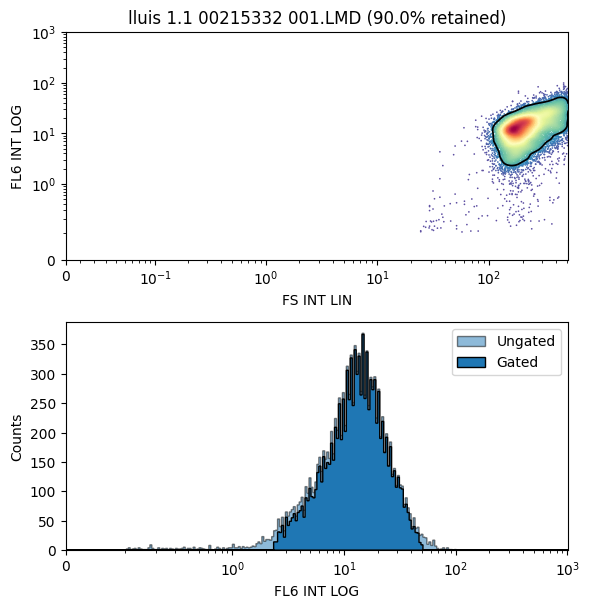

<Figure size 640x480 with 0 Axes>

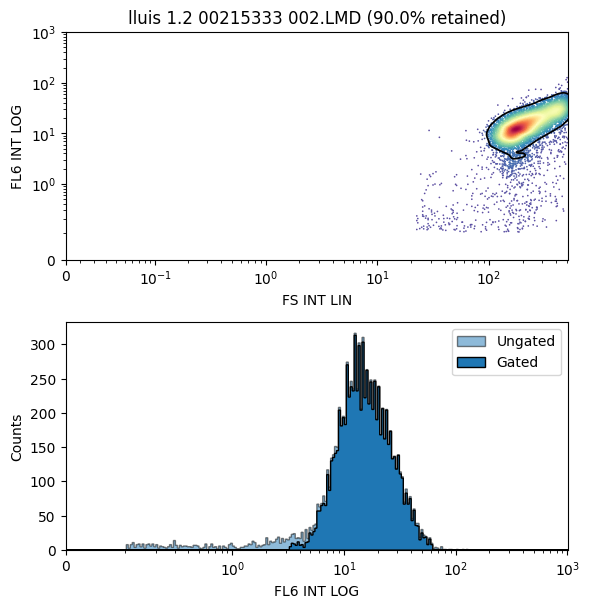

<Figure size 640x480 with 0 Axes>

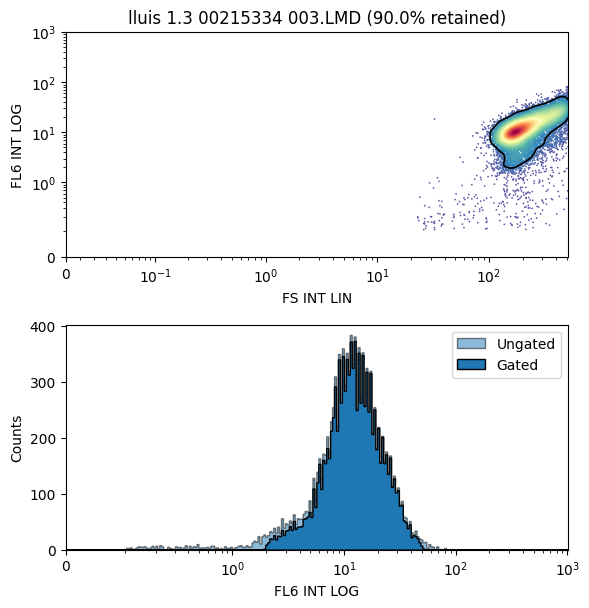

<Figure size 640x480 with 0 Axes>

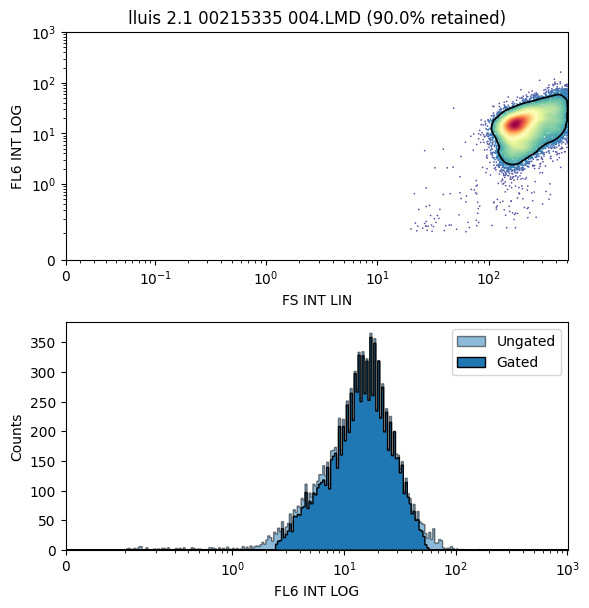

<Figure size 640x480 with 0 Axes>

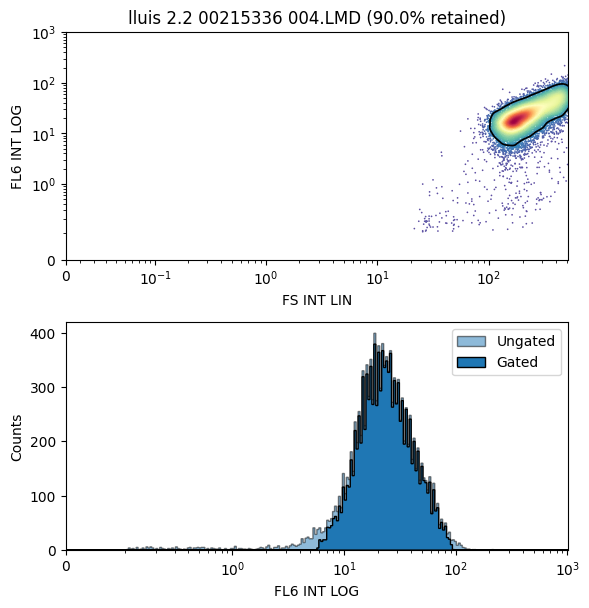

<Figure size 640x480 with 0 Axes>

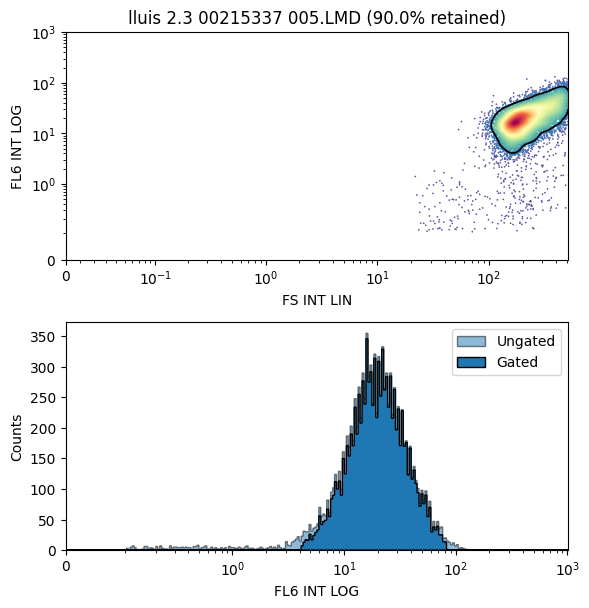

<Figure size 640x480 with 0 Axes>

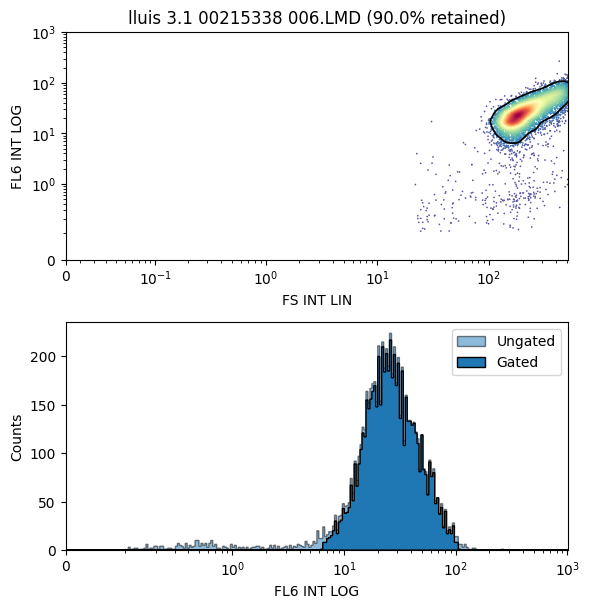

<Figure size 640x480 with 0 Axes>

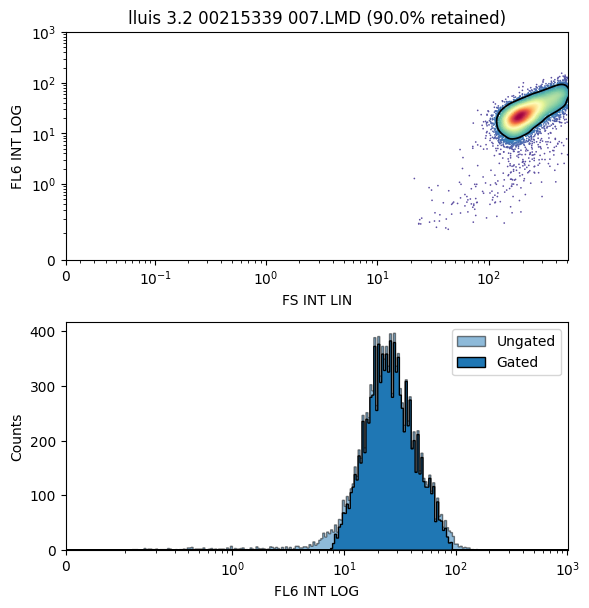

<Figure size 640x480 with 0 Axes>

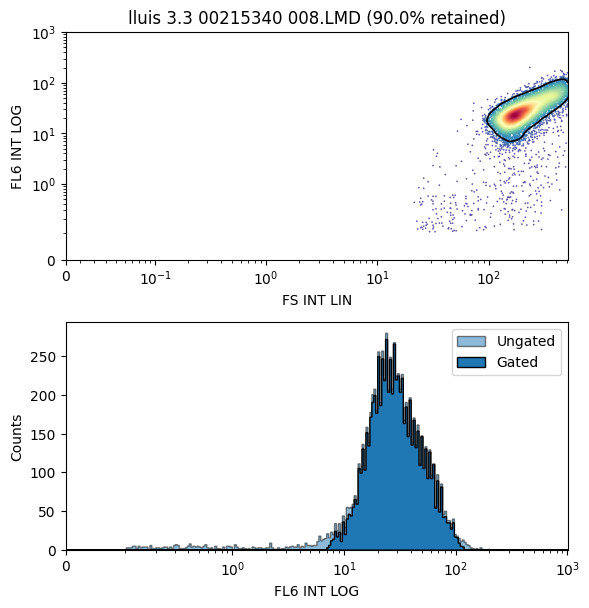

<Figure size 640x480 with 0 Axes>

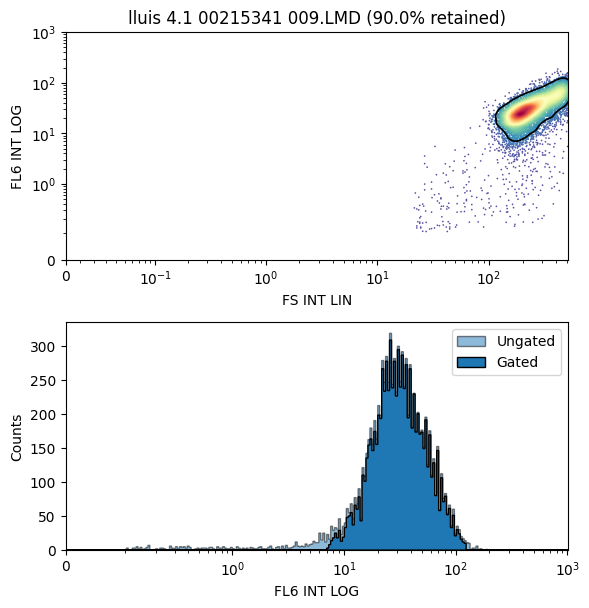

<Figure size 640x480 with 0 Axes>

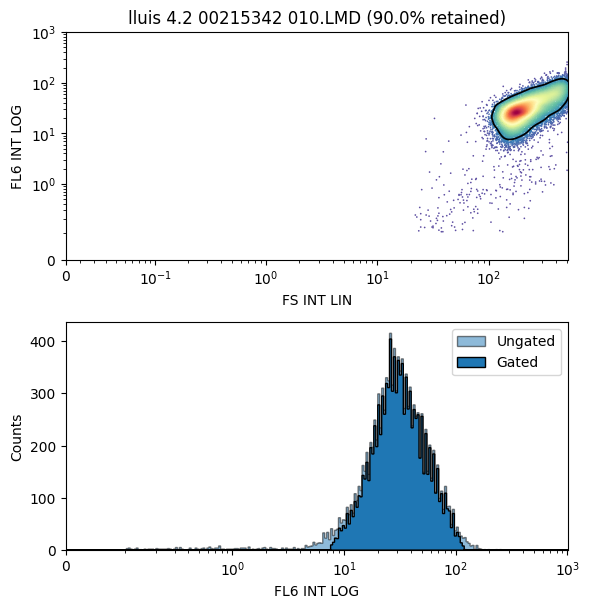

<Figure size 640x480 with 0 Axes>

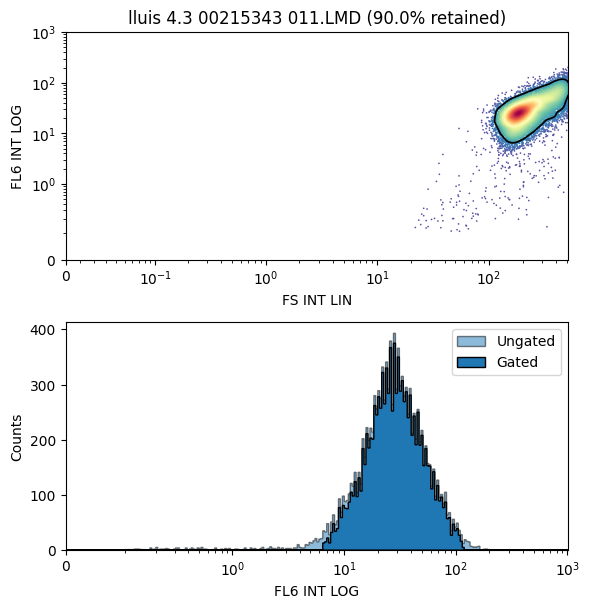

<Figure size 640x480 with 0 Axes>

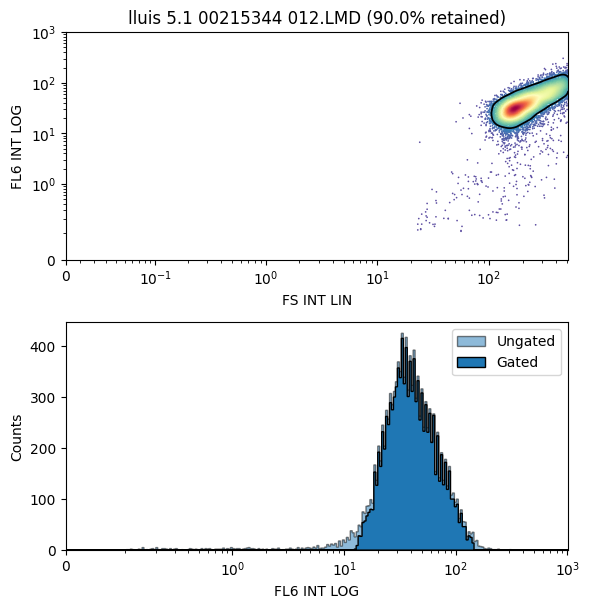

<Figure size 640x480 with 0 Axes>

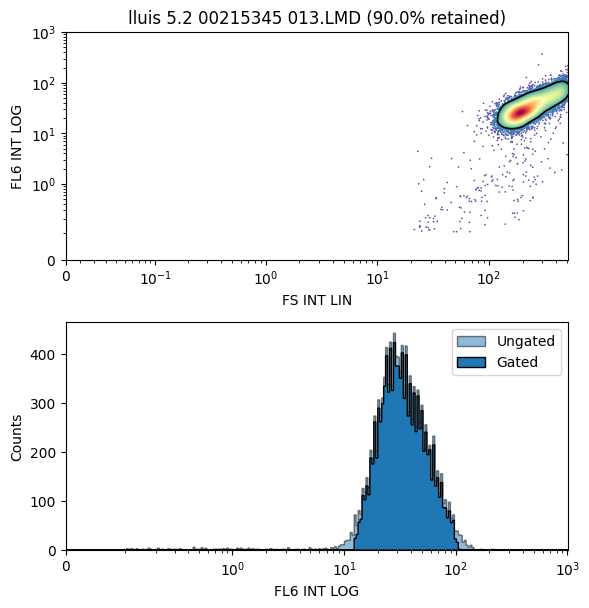

<Figure size 640x480 with 0 Axes>

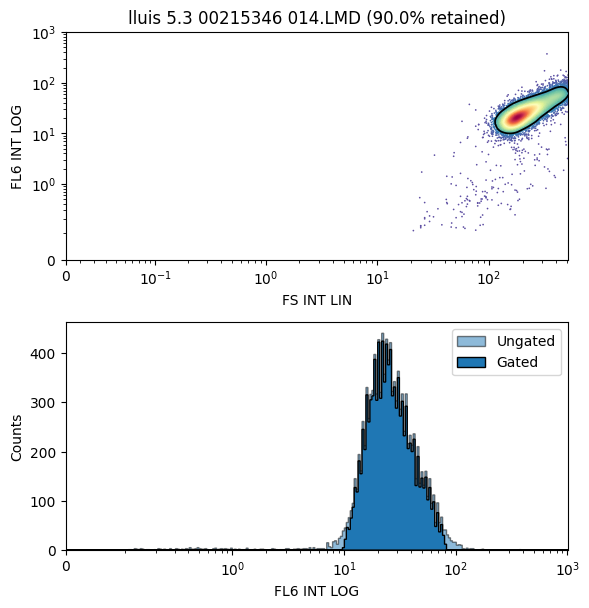

<Figure size 640x480 with 0 Axes>

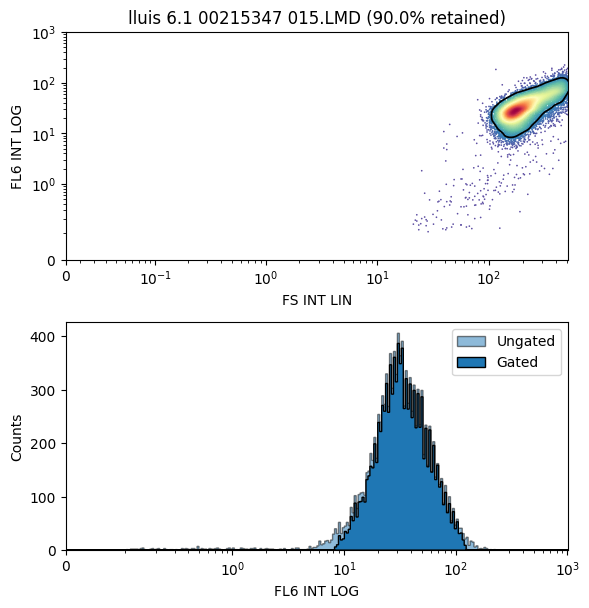

<Figure size 640x480 with 0 Axes>

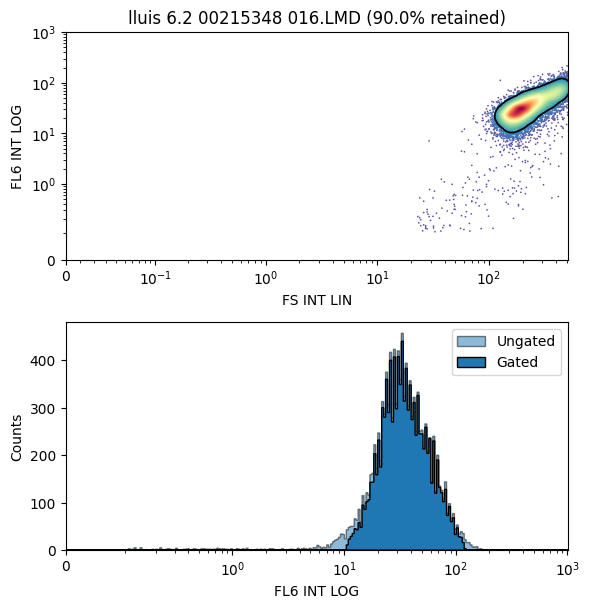

<Figure size 640x480 with 0 Axes>

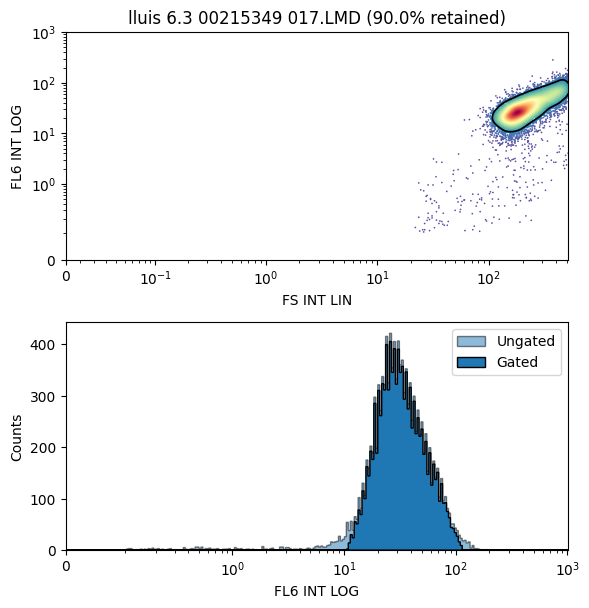

<Figure size 640x480 with 0 Axes>

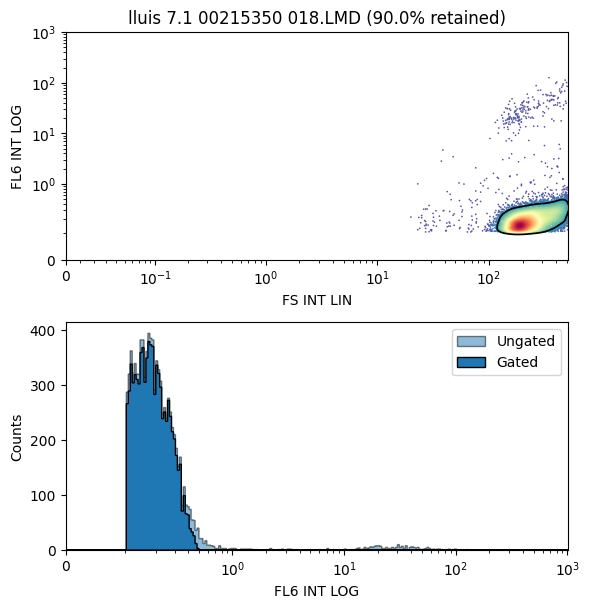

<Figure size 640x480 with 0 Axes>

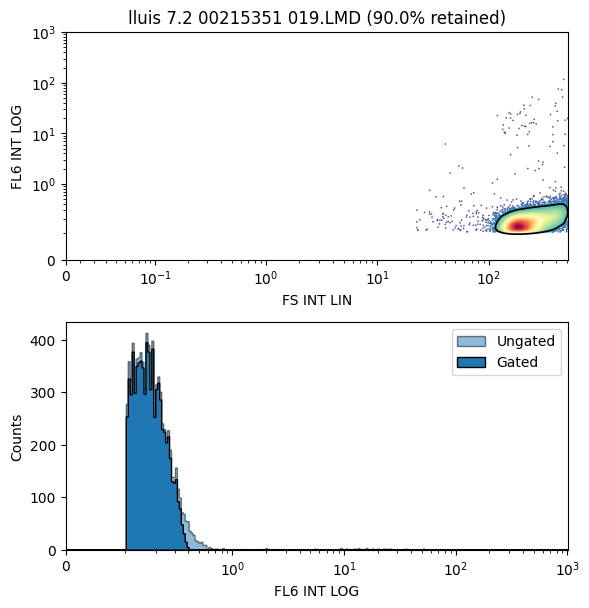

<Figure size 640x480 with 0 Axes>

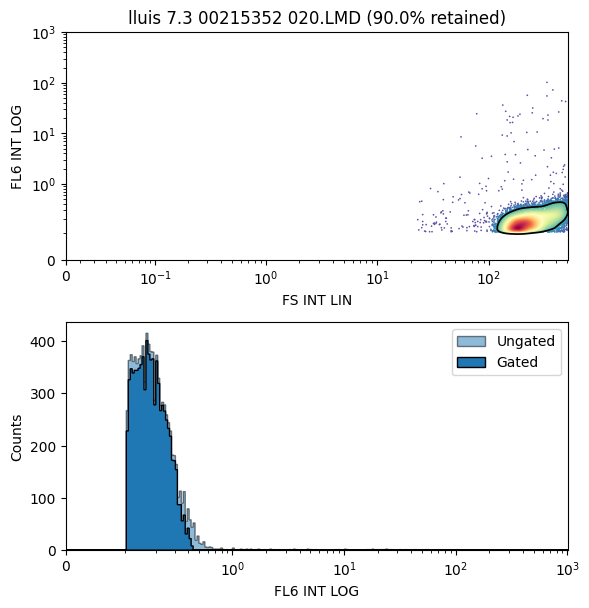

In [4]:
if os.path.isdir(mainP+'Plots') == False:
    os.mkdir(mainP+'Plots')

for i in range(len(flsFC)):

    plt.ioff()

    fig = plt.figure()
    FlowCal.plot.density_and_hist(datsGt1[flsFC[i]],
                                gated_data=datsGt2[flsFC[i]].gated_data,
                                gate_contour=datsGt2[flsFC[i]].contour,
                                density_channels=['FS INT LIN', 'FL6 INT LOG'],
                                density_params={'mode':'scatter'},
                                hist_channels=['FL6 INT LOG'])
    plt.tight_layout()
    
    
    plt.savefig(mainP+'Plots/'+flsFC[i][0:-4]+'.png')
    plt.show()

# Display Calibration Data

In [29]:
Cns = [0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 0] # Concentrations used in the experiment
numCF = [1, 2, 3, 4, 5, 6, 7] # File number for each concentration in Cns (same order)
CnsOrd = [0, 0.25, 0.75, 1.25, 1.75, 2.25, 2.75] # Same vector as Cns but with the sorterd concentrations. 
rps = 3 # Number of replicates

CnsMean = {}
CnsMode = {}
CnsAllT = {}
CnsRepT = {}

for i in range(len(Cns)):
    CnsMean[Cns[i]] = np.zeros(rps)
    CnsMode[Cns[i]] = np.zeros(rps)
    CnsAllT[Cns[i]] = []
    CnsRepT[Cns[i]] = {}
    
    for j in range(len(flsFC)):
        for z in range(rps):
            sxpin = numCF[i] + (z+1)/10
            if str(sxpin) in flsFC[j]:
                CnsMean[Cns[i]][z] = np.mean(datsGt2[flsFC[j]].gated_data[::, 'FL6 INT LOG'])
                CnsMode[Cns[i]][z] = sp.stats.mode(datsGt2[flsFC[j]].gated_data[::, 'FL6 INT LOG'])[0]
                CnsAllT[Cns[i]] = np.concatenate((CnsAllT[Cns[i]],  np.array(datsGt2[flsFC[j]].gated_data[::, 'FL6 INT LOG'])))
                CnsRepT[Cns[i]][z+1] = datsGt2[flsFC[j]].gated_data[::, 'FL6 INT LOG']

### Display Means Curve

3


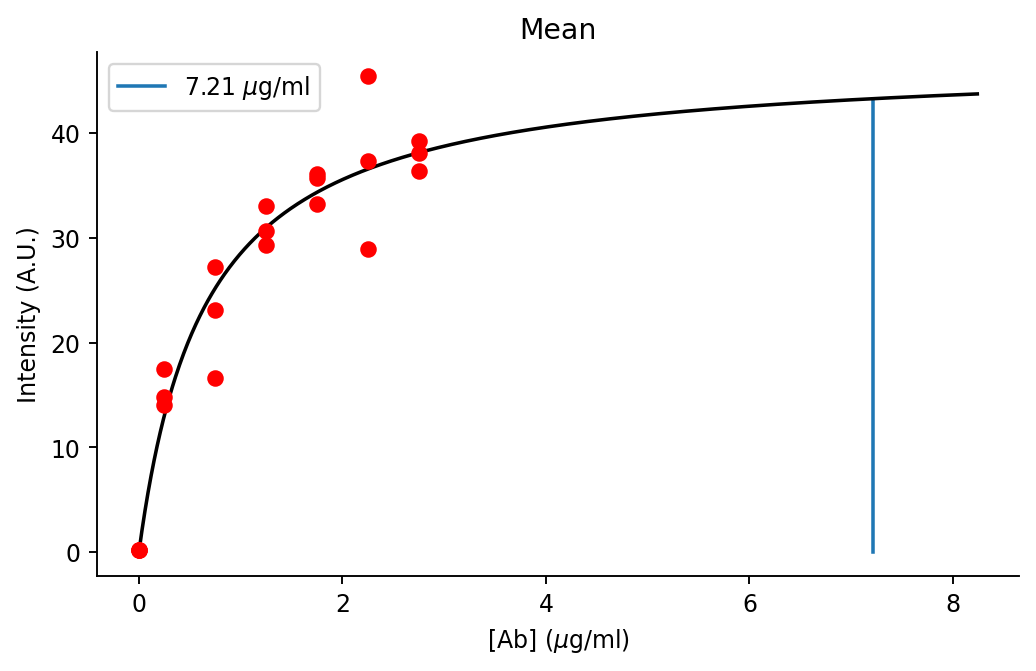

In [30]:
# Curve Fitting
def objective(x, m, h):
    return m * (x / (h + x))

x = np.reshape([list(itertools.repeat(CnsOrd[i], rps)) for i in range(len(CnsOrd))], (len(CnsOrd))*rps) 
y = np.reshape([list(CnsMean[CnsOrd[i]]) for i in range(len(CnsOrd))], len(CnsOrd)*rps) 

popt, ppy = sp.optimize.curve_fit(objective, x, y, p0=(np.max(y), 10))

m, h = popt



#############################################################
# Plot of data and fit



fig, ax = plt.subplots(figsize=(7, 4), dpi=170)

for i in range(10):
    try:
        x_line = np.arange(min(x), max(x)*(i+1), 0.01)
        y_line = objective(x_line,m,h)
        # Satturation point
        indsp = np.where(np.diff(y_line) <= 0.005)[0][0]
        ax.plot([x_line[indsp], x_line[indsp]], [0, y_line[indsp]], label = str(x_line[indsp])+" $\mu$g/ml")

        ax.plot(x_line, y_line, color = "Black")
        print(i+1)
        break
    except:
        pass

for i in range(len(CnsOrd)):
    ax.scatter(np.array(list(itertools.repeat(CnsOrd[i], rps))),    CnsMean[CnsOrd[i]], color = "Red", zorder=10)
    

ax.set_ylabel('Intensity (A.U.)')
ax.set_xlabel(r"[Ab] ($\mu$g/ml)")
ax.spines[['right', 'top']].set_visible(False)
ax.legend()
ax.set_title("Mean")
# ax.set_ylim(0,2)
plt.show()

### Display Modes Curve

3


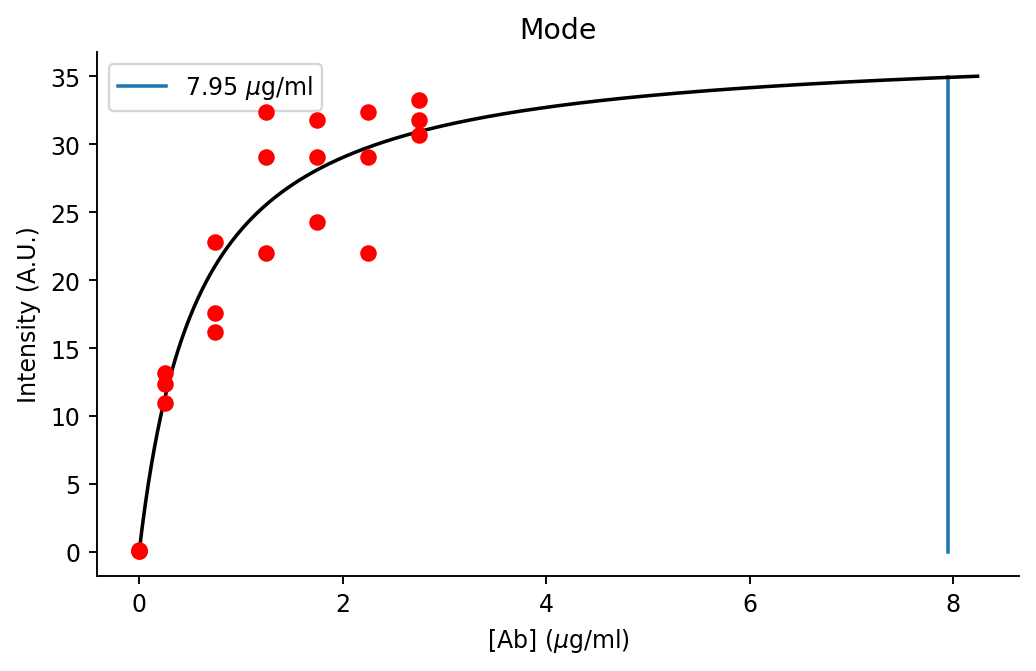

In [31]:
# Curve Fitting
def objective(x, m, h):
    return m * (x / (h + x))
	
x = np.reshape([list(itertools.repeat(CnsOrd[i], rps)) for i in range(len(CnsOrd))], (len(CnsOrd))*rps)
y = np.reshape([list(CnsMode[CnsOrd[i]]) for i in range(len(CnsOrd))], len(CnsOrd)*rps)


popt, ppy = sp.optimize.curve_fit(objective, x, y, p0=(np.max(y), 10))

m,h = popt



#############################################################
# Plot of data and fit



fig, ax = plt.subplots(figsize=(7, 4), dpi=170)

for i in range(10):
    try:
        x_line = np.arange(min(x), max(x)*(i+1), 0.01)
        y_line = objective(x_line, m,h)
        # Satturation point
        indsp = np.where(np.diff(y_line) <= 0.003)[0][0] ######################## SMALLER THAN IN THE MEAN
        ax.plot([x_line[indsp], x_line[indsp]], [0, y_line[indsp]], label = str(x_line[indsp])+" $\mu$g/ml")

        ax.plot(x_line, y_line, color = "Black")
        print(i+1)
        break
    except:
        pass


for i in range(len(CnsOrd)):
    ax.scatter(np.array(list(itertools.repeat(CnsOrd[i], rps))),    CnsMode[CnsOrd[i]], color = "Red", zorder=10)


ax.set_ylabel('Intensity (A.U.)')
ax.set_xlabel(r"[Ab] ($\mu$g/ml)")
ax.spines[['right', 'top']].set_visible(False)
ax.legend()
ax.set_title("Mode")
# ax.set_ylim(0,2)
plt.show()

### Use All Data for Curve Fit

4


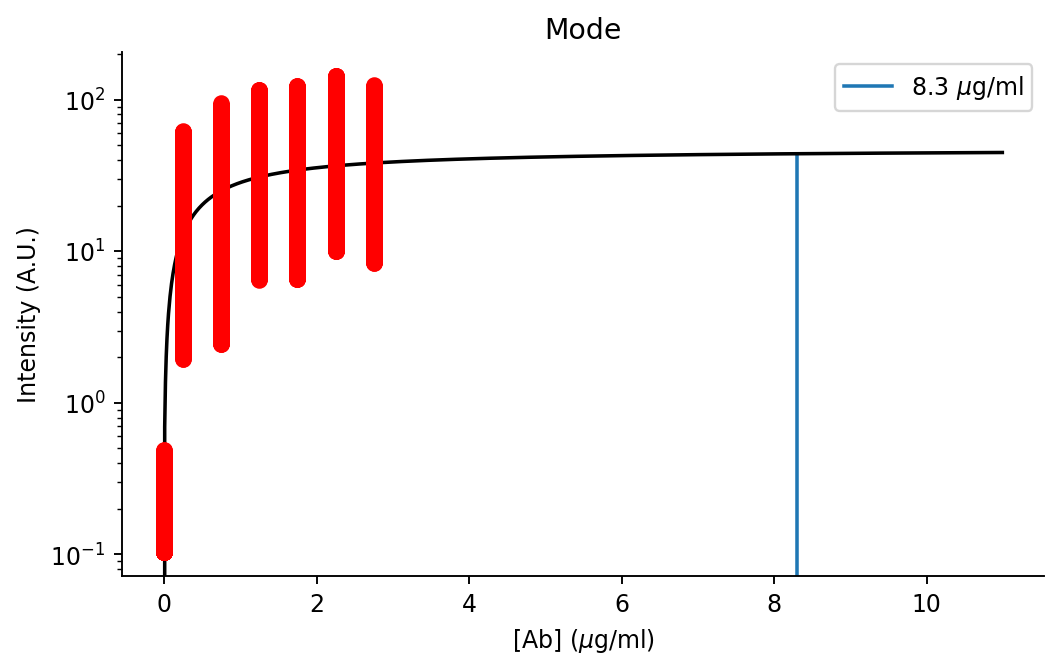

In [100]:
# Curve Fitting
def objective(x, m, h):
    return m * (x / (h + x))

xx = np.concatenate([np.array(list(itertools.repeat(CnsOrd[i], len(CnsAllT[CnsOrd[i]])))) for i in range(len(CnsOrd))])
yy = np.concatenate([CnsAllT[CnsOrd[i]] for i in range(len(CnsOrd))])

popt, ppy = sp.optimize.curve_fit(objective, xx, yy, p0=(np.max(yy), 10))

m,h = popt



#############################################################
# Plot of data and fit



fig, ax = plt.subplots(figsize=(7, 4), dpi=170)

for i in range(15):
    try:
        x_line = np.arange(min(xx), max(xx)*(i+1), 0.01)
        y_line = objective(x_line, m,h)
        # Satturation point
        indsp = np.where(np.diff(y_line) <= 0.004)[0][0] ######################## SMALLER THAN IN THE MEAN
        ax.plot([x_line[indsp], x_line[indsp]], [0, y_line[indsp]], label = str(x_line[indsp])+" $\mu$g/ml")

        ax.plot(x_line, y_line, color = "Black")
        print(i+1)
        break
    except:
        pass

ax.scatter(xx, yy, color = "Red", zorder=10)


ax.set_ylabel('Intensity (A.U.)')
ax.set_xlabel(r"[Ab] ($\mu$g/ml)")
ax.spines[['right', 'top']].set_visible(False)
ax.legend()
ax.set_title("Mode")
ax.set_yscale('log')
# ax.set_ylim(0,2)
plt.show()

### Kernel Density Estimate

ModeResult(mode=0.12368903653634912, count=357)
ModeResult(mode=11.003984162010292, count=261)
ModeResult(mode=17.56608405855108, count=273)
ModeResult(mode=29.06865627912965, count=226)
ModeResult(mode=32.38172324012421, count=257)
ModeResult(mode=32.38172324012421, count=307)
ModeResult(mode=31.80441828991698, count=313)


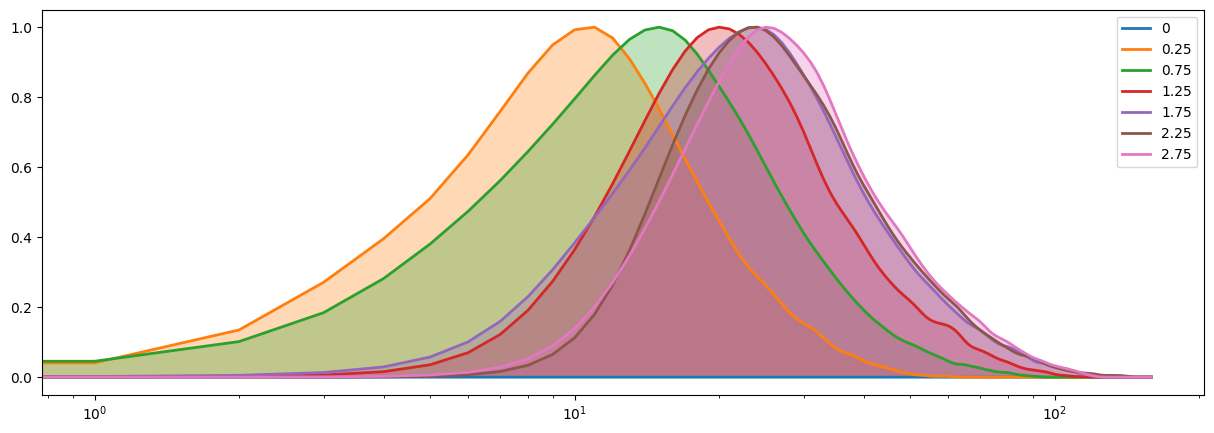

In [32]:
fig, ax = plt.subplots(figsize=(15,5))

mds = []
mnn = []

for i in range(len(CnsOrd)):
    kde1 = sp.stats.gaussian_kde(CnsAllT[CnsOrd[i]])
    xx = np.arange(0, 160, 1)
    yy = kde1(xx)

    ax.plot(xx, yy / np.max(yy), linewidth=2, label = str(CnsOrd[i]))
    ax.legend()
    ax.set_xscale('log')
    plt.fill_between(x=xx, y1=yy/ np.max(yy), alpha=0.3)
    
    mds.append(sp.stats.mode(np.log(CnsAllT[CnsOrd[i]]))[0])
    mnn.append(np.mean(np.log(CnsAllT[CnsOrd[i]])))
    
    print(sp.stats.mode(CnsAllT[CnsOrd[i]]))

plt.show()

2


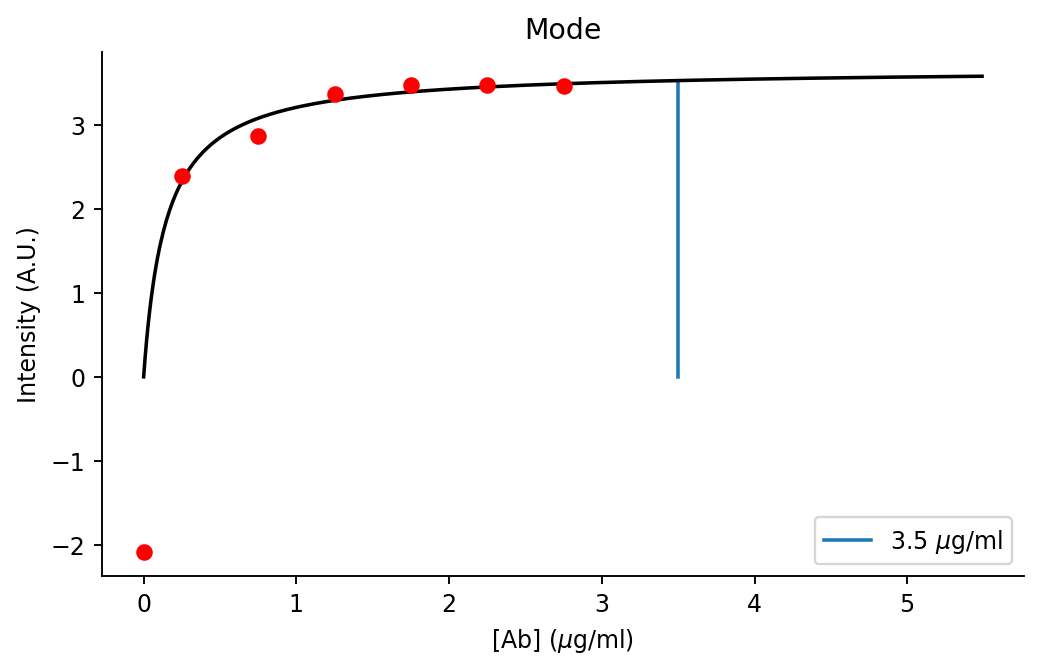

In [25]:
# Curve Fitting
def objective(x, m, h):
    return m * (x / (h + x))


x = CnsOrd
y = mds


popt, ppy = sp.optimize.curve_fit(objective, x, y, p0=(np.max(y), 10))

m,h = popt



#############################################################
# Plot of data and fit



fig, ax = plt.subplots(figsize=(7, 4), dpi=170)

for i in range(10):
    try:
        x_line = np.arange(min(x), max(x)*(i+1), 0.01)
        y_line = objective(x_line, m,h)
        # Satturation point
        indsp = np.where(np.diff(y_line) <= 0.0004)[0][0] ######################## SMALLER THAN IN THE MEAN
        ax.plot([x_line[indsp], x_line[indsp]], [0, y_line[indsp]], label = str(x_line[indsp])+" $\mu$g/ml")

        ax.plot(x_line, y_line, color = "Black")
        print(i+1)
        break
    except:
        pass

ax.scatter(x, y, color = "Red", zorder=10)


ax.set_ylabel('Intensity (A.U.)')
ax.set_xlabel(r"[Ab] ($\mu$g/ml)")
ax.spines[['right', 'top']].set_visible(False)
ax.legend()
ax.set_title("Mode")
# ax.set_ylim(0,2)
plt.show()

2


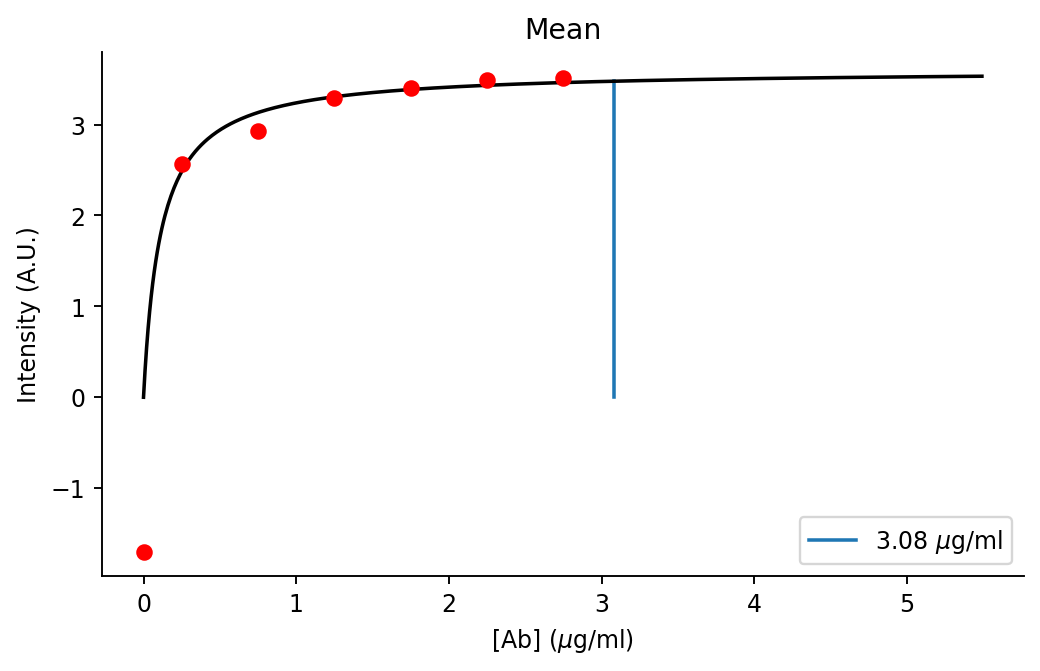

In [26]:
# Curve Fitting
def objective(x, m, h):
    return m * (x / (h + x))


x = CnsOrd
y = mnn


popt, ppy = sp.optimize.curve_fit(objective, x, y, p0=(np.max(y), 10))

m,h = popt



#############################################################
# Plot of data and fit



fig, ax = plt.subplots(figsize=(7, 4), dpi=170)

for i in range(10):
    try:
        x_line = np.arange(min(x), max(x)*(i+1), 0.01)
        y_line = objective(x_line, m,h)
        # Satturation point
        indsp = np.where(np.diff(y_line) <= 0.0004)[0][0] ######################## SMALLER THAN IN THE MEAN
        ax.plot([x_line[indsp], x_line[indsp]], [0, y_line[indsp]], label = str(x_line[indsp])+" $\mu$g/ml")

        ax.plot(x_line, y_line, color = "Black")
        print(i+1)
        break
    except:
        pass

ax.scatter(x, y, color = "Red", zorder=10)


ax.set_ylabel('Intensity (A.U.)')
ax.set_xlabel(r"[Ab] ($\mu$g/ml)")
ax.spines[['right', 'top']].set_visible(False)
ax.legend()
ax.set_title("Mean")
# ax.set_ylim(0,2)
plt.show()

# Load New Calibration Curve (0 to 12)

In [101]:
mainP2 = 'C:/IBECPostDocDrive/2024_01_16_NCvsKR/Paper/FlowCytometry/251013 Lluis/' # Main experiment with increasing Ab concentrations

fls2 = os.listdir(mainP2)
flsFC2 = [fls2[i] for i in range(len(fls2)) if fls2[i][-3::] != 'PDF' and fls2[i] != 'Plots']

flsFC2

['Lluis 1_1 00215423 021.LMD',
 'Lluis 1_2 00215424 022.LMD',
 'Lluis 1_3 00215425 023.LMD',
 'Lluis 1_4 00215426 024.LMD',
 'Lluis 2_1 00215427 025.LMD',
 'Lluis 2_2 00215428 026.LMD',
 'Lluis 2_3 00215429 027.LMD',
 'Lluis 2_4 00215430 028.LMD',
 'Lluis 3_1 00215431 029.LMD',
 'Lluis 3_2 00215432 030.LMD',
 'Lluis 3_3 00215433 031.LMD',
 'Lluis 3_4 00215434 032.LMD',
 'Lluis 4_1 00215435 033.LMD',
 'Lluis 4_2 00215436 034.LMD',
 'Lluis 4_3 00215437 035.LMD',
 'Lluis 4_4 00215438 036.LMD',
 'Lluis 5_1 00215439 037.LMD',
 'Lluis 5_2 00215440 038.LMD',
 'Lluis 5_3 00215441 039.LMD',
 'Lluis 5_4 00215442 040.LMD']

In [102]:
datsb = {}
datsGt1b = {}
datsGt2b = {}

for i in range(len(flsFC2)):
    datsb[flsFC2[i]] = FlowCal.transform.to_rfi(FlowCal.io.FCSData(mainP2+flsFC2[i]))
    
    datsGt1b[flsFC2[i]] = FlowCal.gate.high_low(datsb[flsFC2[i]], channels=['FS INT LIN', 'FL6 INT LOG'])

    datsGt2b[flsFC2[i]] = FlowCal.gate.density2d(datsGt1b[flsFC2[i]],
                                channels=['FS INT LIN', 'FL6 INT LOG'],
                                gate_fraction=0.9,
                                full_output=True)

c:\Users\dgomez\AppData\Local\anaconda3\Lib\site-packages\FlowCal\io.py:798: UserWarning: detected (and ignoring) additional data set ($NEXTDATA = 618370)
  warnings.warn("detected (and ignoring) additional data set"
c:\Users\dgomez\AppData\Local\anaconda3\Lib\site-packages\FlowCal\io.py:798: UserWarning: detected (and ignoring) additional data set ($NEXTDATA = 611602)
  warnings.warn("detected (and ignoring) additional data set"
c:\Users\dgomez\AppData\Local\anaconda3\Lib\site-packages\FlowCal\io.py:798: UserWarning: detected (and ignoring) additional data set ($NEXTDATA = 614986)
  warnings.warn("detected (and ignoring) additional data set"
c:\Users\dgomez\AppData\Local\anaconda3\Lib\site-packages\FlowCal\io.py:798: UserWarning: detected (and ignoring) additional data set ($NEXTDATA = 608902)
  warnings.warn("detected (and ignoring) additional data set"
c:\Users\dgomez\AppData\Local\anaconda3\Lib\site-packages\FlowCal\io.py:798: UserWarning: detected (and ignoring) additional data se

<Figure size 640x480 with 0 Axes>

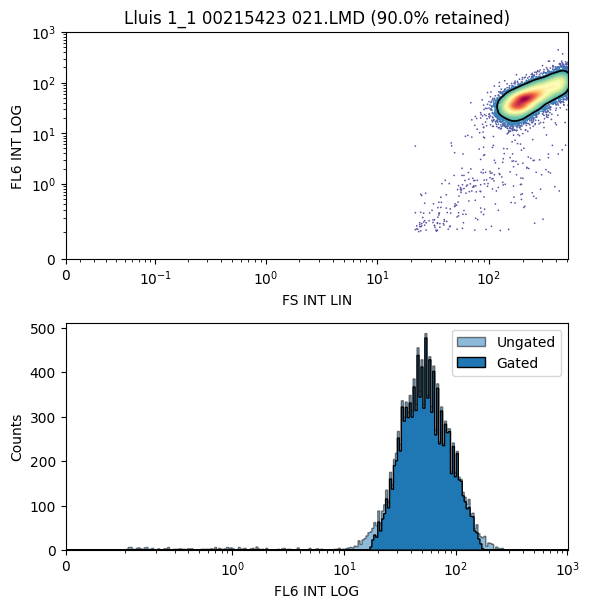

<Figure size 640x480 with 0 Axes>

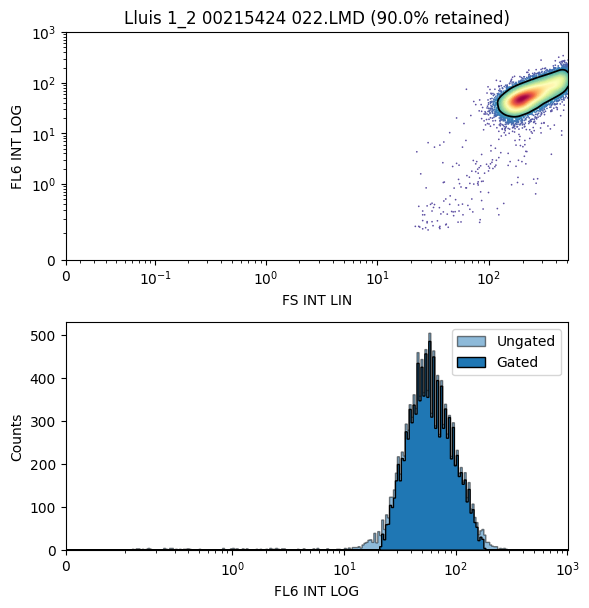

<Figure size 640x480 with 0 Axes>

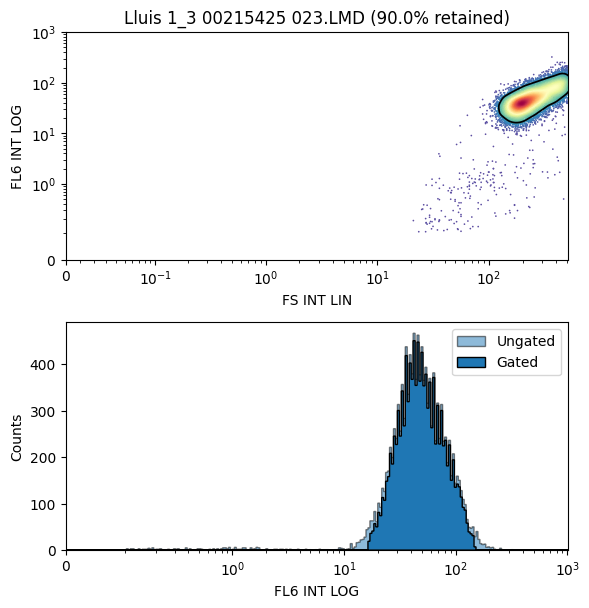

<Figure size 640x480 with 0 Axes>

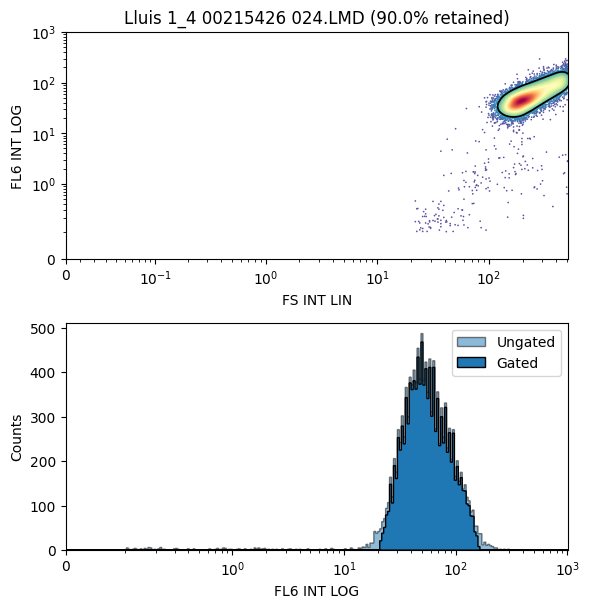

<Figure size 640x480 with 0 Axes>

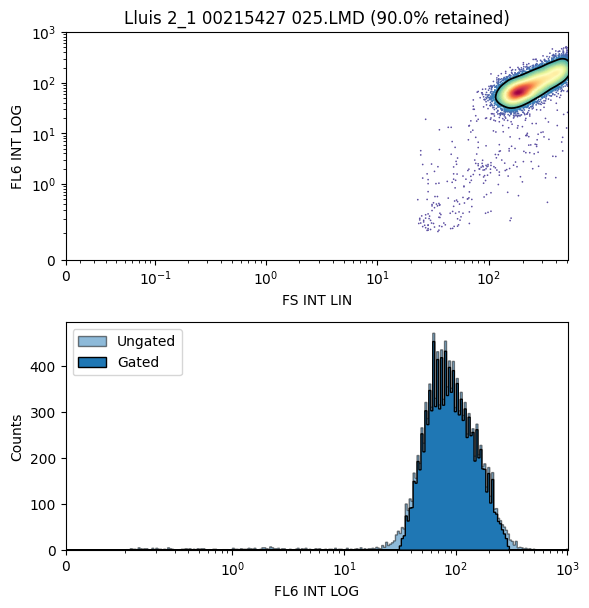

<Figure size 640x480 with 0 Axes>

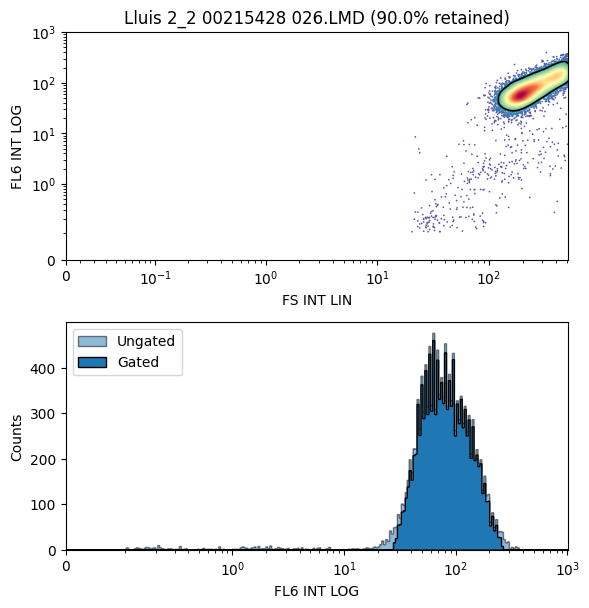

<Figure size 640x480 with 0 Axes>

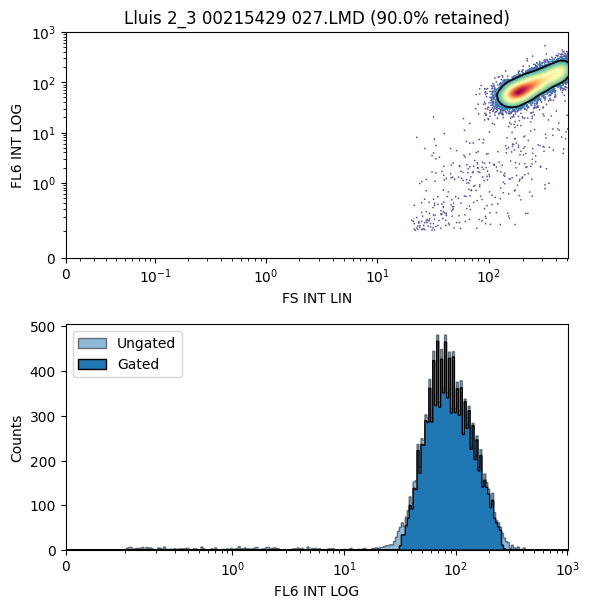

<Figure size 640x480 with 0 Axes>

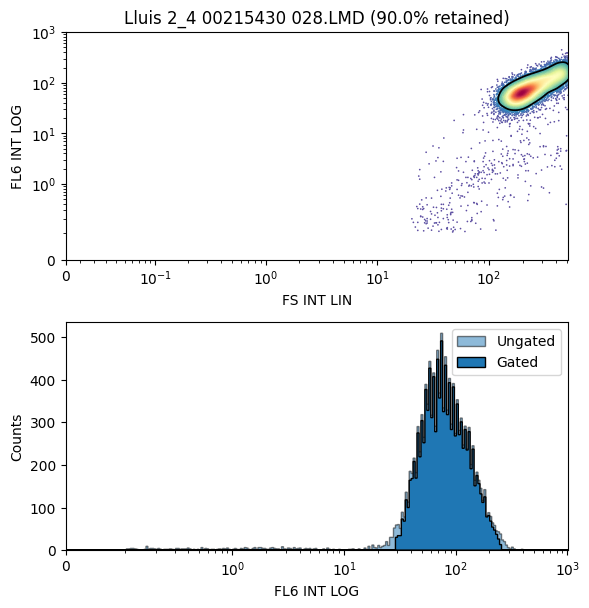

<Figure size 640x480 with 0 Axes>

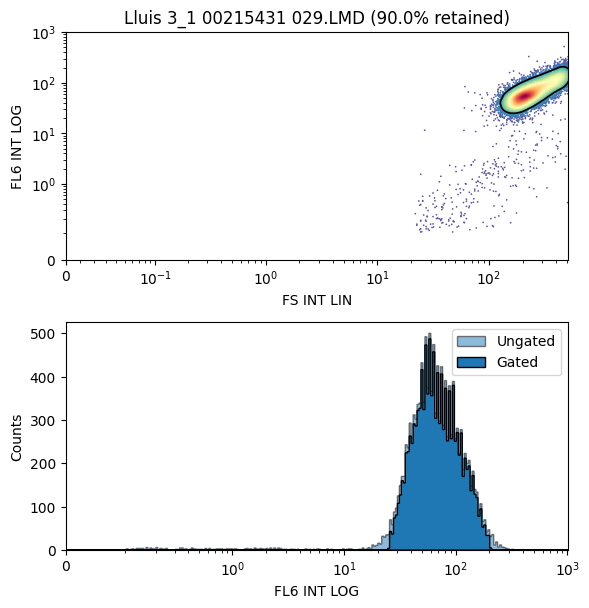

<Figure size 640x480 with 0 Axes>

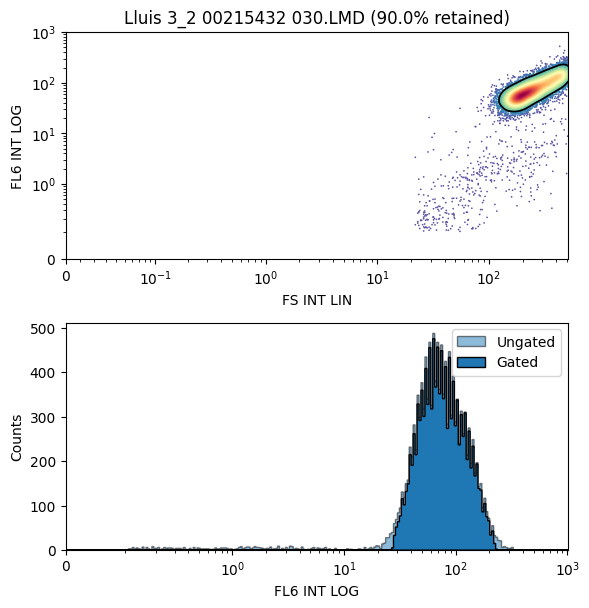

<Figure size 640x480 with 0 Axes>

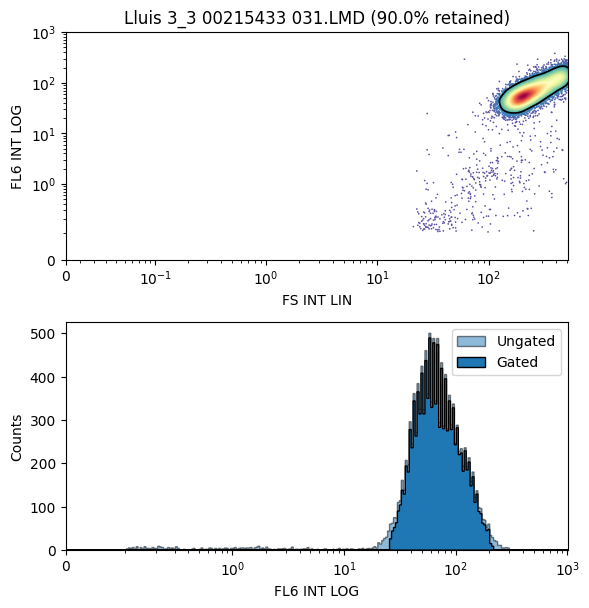

<Figure size 640x480 with 0 Axes>

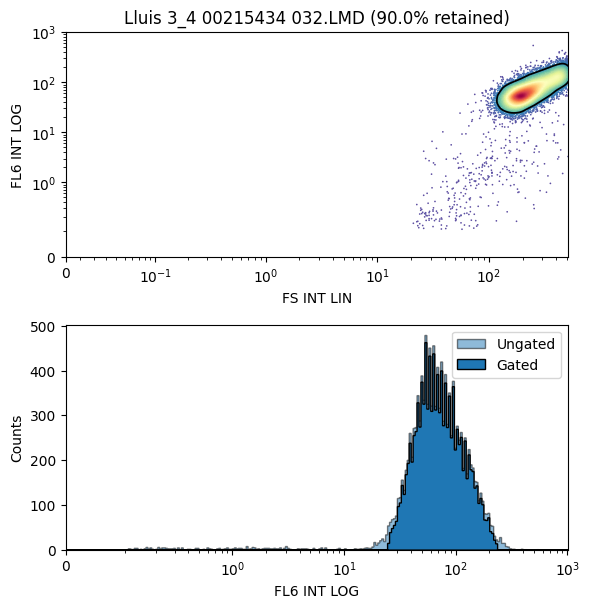

<Figure size 640x480 with 0 Axes>

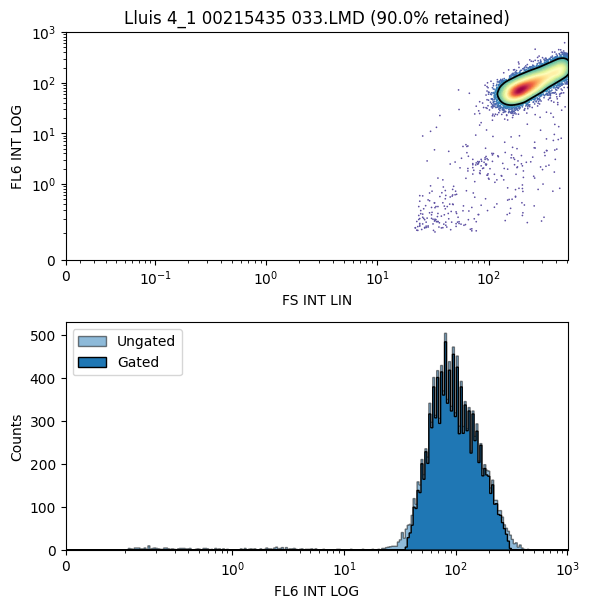

<Figure size 640x480 with 0 Axes>

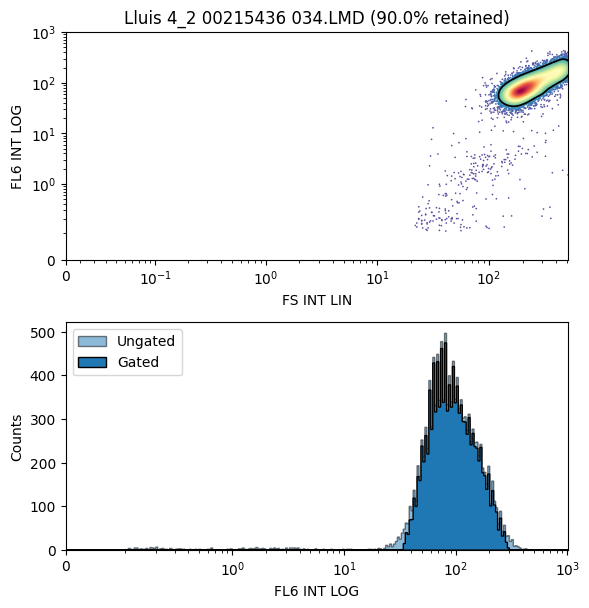

<Figure size 640x480 with 0 Axes>

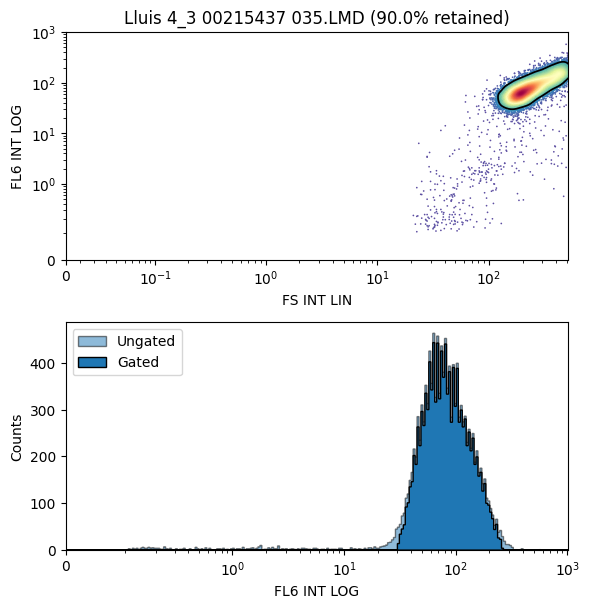

<Figure size 640x480 with 0 Axes>

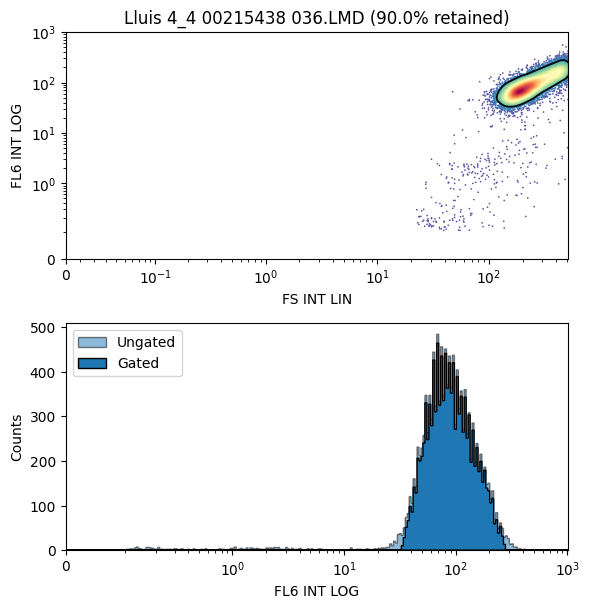

<Figure size 640x480 with 0 Axes>

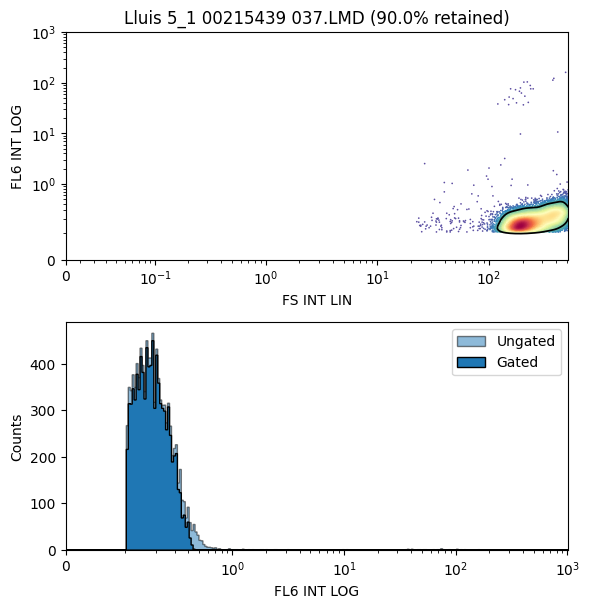

<Figure size 640x480 with 0 Axes>

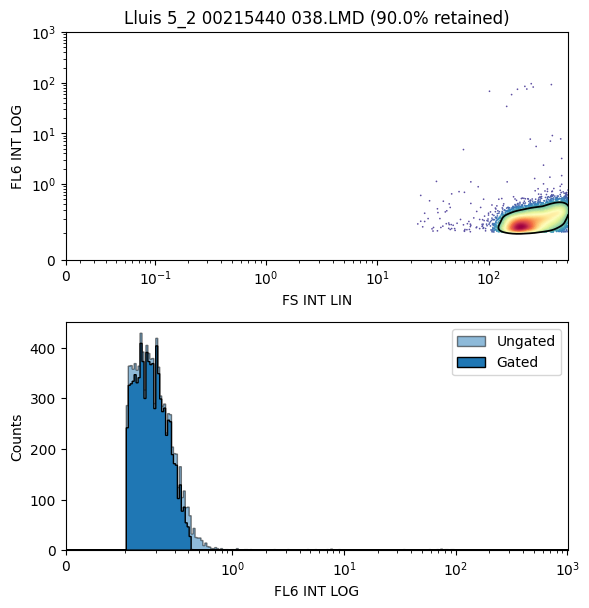

<Figure size 640x480 with 0 Axes>

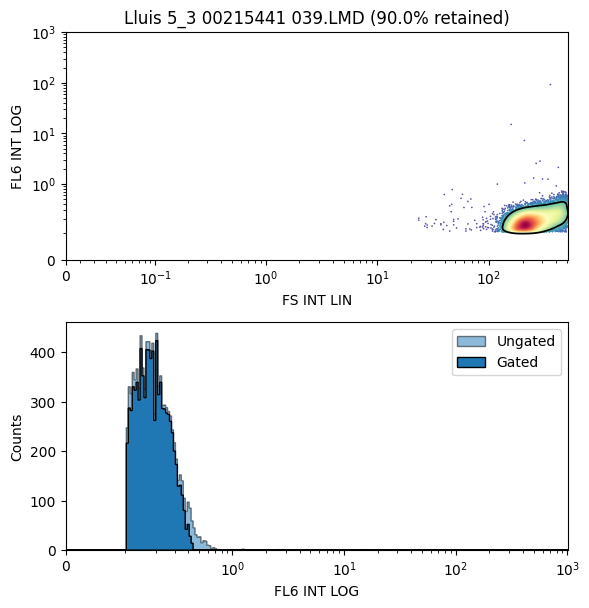

<Figure size 640x480 with 0 Axes>

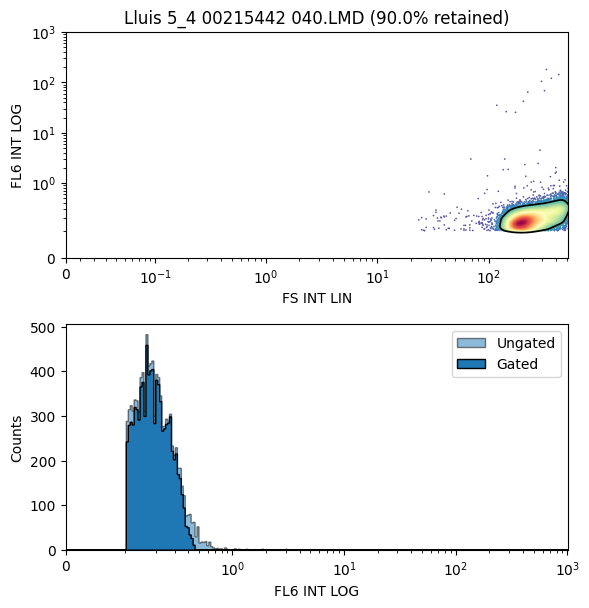

In [106]:
if os.path.isdir(mainP2+'Plots') == False:
    os.mkdir(mainP2+'Plots')

for i in range(len(flsFC2)):

    plt.ioff()

    fig = plt.figure()
    FlowCal.plot.density_and_hist(datsGt1b[flsFC2[i]],
                                gated_data=datsGt2b[flsFC2[i]].gated_data,
                                gate_contour=datsGt2b[flsFC2[i]].contour,
                                density_channels=['FS INT LIN', 'FL6 INT LOG'],
                                density_params={'mode':'scatter'},
                                hist_channels=['FL6 INT LOG'])
    plt.tight_layout()
    
    
    plt.savefig(mainP2+'Plots/'+flsFC2[i][0:-4]+'.png')
    plt.show()

In [108]:
CnsMeanb = {}
CnsModeb = {}
CnsAllTb = {}
CnsRepTb = {}

Cns2 = [3, 6, 9, 12, 0] # Concentrations used in the experiment
numCF2 = [1, 2, 3, 4, 5] # File number for each concentration in Cns (same order)
CnsOrd2 = [0, 3, 6, 9, 12] # Same vector as Cns but with the sorterd concentrations. 
rps2 = 4

for i in range(len(Cns2)):
    CnsMeanb[Cns2[i]] = np.zeros(rps2)
    CnsModeb[Cns2[i]] = np.zeros(rps2)
    CnsAllTb[Cns2[i]] = []
    CnsRepTb[Cns2[i]] = {}
    
    for j in range(len(flsFC2)):
        for z in range(rps2):
            sxpin = str(numCF2[i]) + '_' + str(z+1)
            if str(sxpin) in flsFC2[j]:
                CnsMeanb[Cns2[i]][z] = np.mean(datsGt2b[flsFC2[j]].gated_data[::, 'FL6 INT LOG'])
                CnsModeb[Cns2[i]][z] = sp.stats.mode(datsGt2b[flsFC2[j]].gated_data[::, 'FL6 INT LOG'])[0]
                CnsAllTb[Cns2[i]] = np.concatenate((CnsAllTb[Cns2[i]],  np.array(datsGt2b[flsFC2[j]].gated_data[::, 'FL6 INT LOG'])))
                CnsRepTb[Cns2[i]][z+1] = datsGt2b[flsFC2[j]].gated_data[::, 'FL6 INT LOG']

### Display Means Curve

1


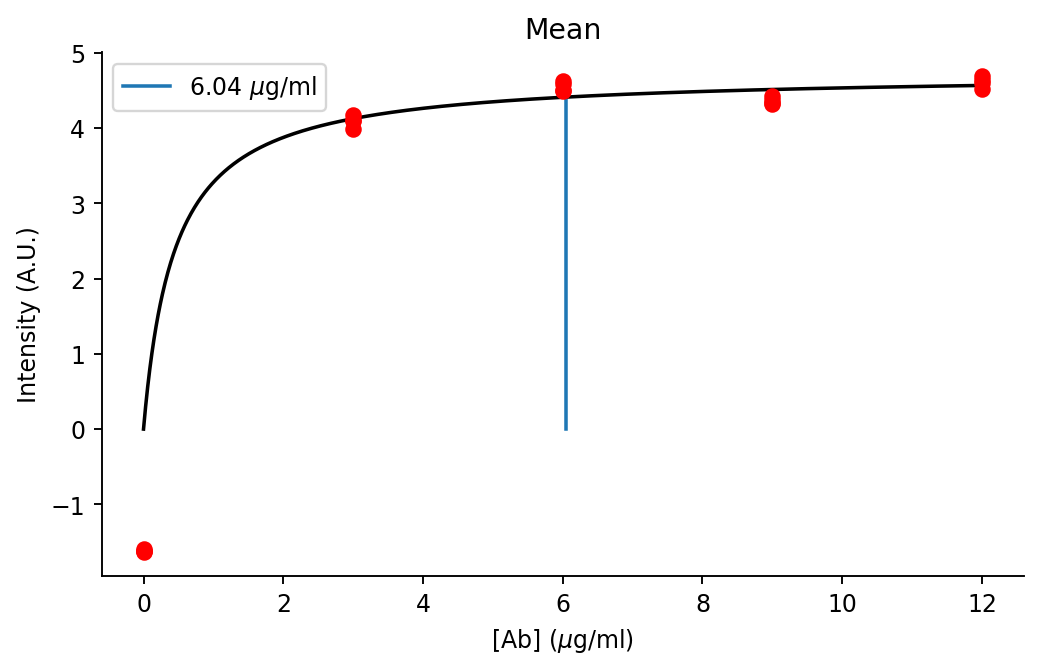

In [117]:
# Curve Fitting
def objective(x, m, h):
    return m * (x / (h + x))

x = np.reshape([list(itertools.repeat(CnsOrd2[i], rps2)) for i in range(len(CnsOrd2))], (len(CnsOrd2))*rps2) 
y = np.log(np.reshape([list(CnsMeanb[CnsOrd2[i]]) for i in range(len(CnsOrd2))], len(CnsOrd2)*rps2) )

popt, ppy = sp.optimize.curve_fit(objective, x, y, p0=(np.max(y), 10))

m, h = popt



#############################################################
# Plot of data and fit



fig, ax = plt.subplots(figsize=(7, 4), dpi=170)

for i in range(10):
    try:
        x_line = np.arange(min(x), max(x)*(i+1), 0.01)
        y_line = objective(x_line,m,h)
        # Satturation point
        indsp = np.where(np.diff(y_line) <= 0.0005)[0][0]
        ax.plot([x_line[indsp], x_line[indsp]], [0, y_line[indsp]], label = str(x_line[indsp])+" $\mu$g/ml")

        ax.plot(x_line, y_line, color = "Black")
        print(i+1)
        break
    except:
        pass

for i in range(len(CnsOrd2)):
    ax.scatter(np.array(list(itertools.repeat(CnsOrd2[i], rps2))),    np.log(CnsMeanb[CnsOrd2[i]]), color = "Red", zorder=10)
    

ax.set_ylabel('Intensity (A.U.)')
ax.set_xlabel(r"[Ab] ($\mu$g/ml)")
ax.spines[['right', 'top']].set_visible(False)
ax.legend()
ax.set_title("Mean")
# ax.set_ylim(0,2)
plt.show()

### Display Modes Curve

1


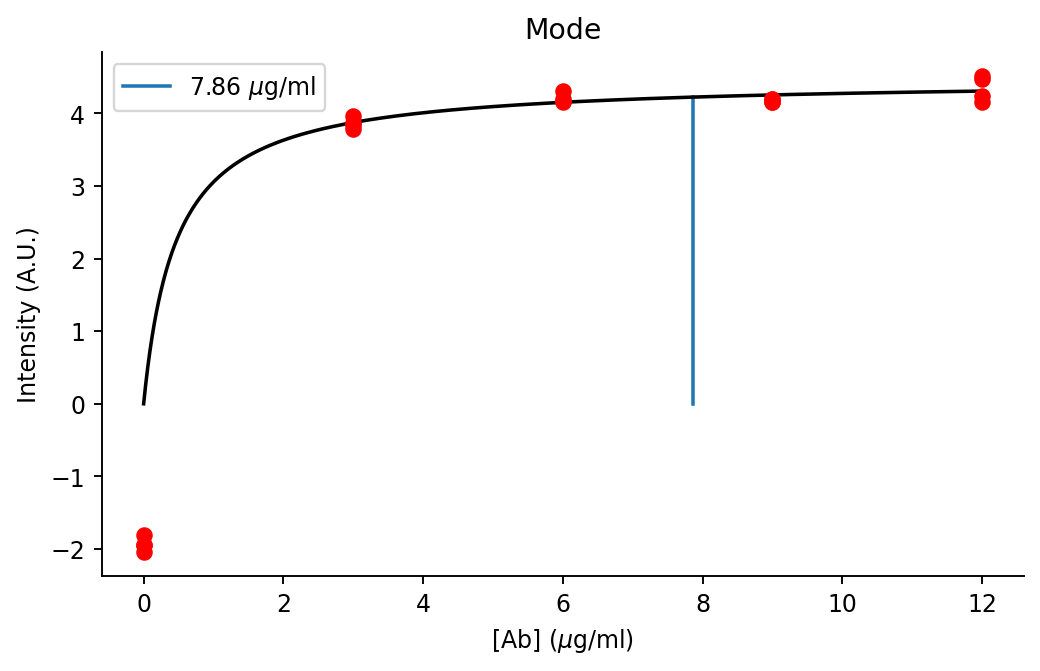

In [120]:
# Curve Fitting
def objective(x, m, h):
    return m * (x / (h + x))
	
x = np.reshape([list(itertools.repeat(CnsOrd2[i], rps2)) for i in range(len(CnsOrd2))], (len(CnsOrd2))*rps2)
y = np.log(np.reshape([list(CnsModeb[CnsOrd2[i]]) for i in range(len(CnsOrd2))], len(CnsOrd2)*rps2))


popt, ppy = sp.optimize.curve_fit(objective, x, y, p0=(np.max(y), 10))

m,h = popt



#############################################################
# Plot of data and fit



fig, ax = plt.subplots(figsize=(7, 4), dpi=170)

for i in range(10):
    try:
        x_line = np.arange(min(x), max(x)*(i+1), 0.01)
        y_line = objective(x_line, m,h)
        # Satturation point
        indsp = np.where(np.diff(y_line) <= 0.0003)[0][0] ######################## SMALLER THAN IN THE MEAN
        ax.plot([x_line[indsp], x_line[indsp]], [0, y_line[indsp]], label = str(x_line[indsp])+" $\mu$g/ml")

        ax.plot(x_line, y_line, color = "Black")
        print(i+1)
        break
    except:
        pass


for i in range(len(CnsOrd2)):
    ax.scatter(np.array(list(itertools.repeat(CnsOrd2[i], rps2))),    np.log(CnsModeb[CnsOrd2[i]]), color = "Red", zorder=10)


ax.set_ylabel('Intensity (A.U.)')
ax.set_xlabel(r"[Ab] ($\mu$g/ml)")
ax.spines[['right', 'top']].set_visible(False)
ax.legend()
ax.set_title("Mode")
# ax.set_ylim(0,2)
plt.show()

### Use All Data for Curve Fit

1


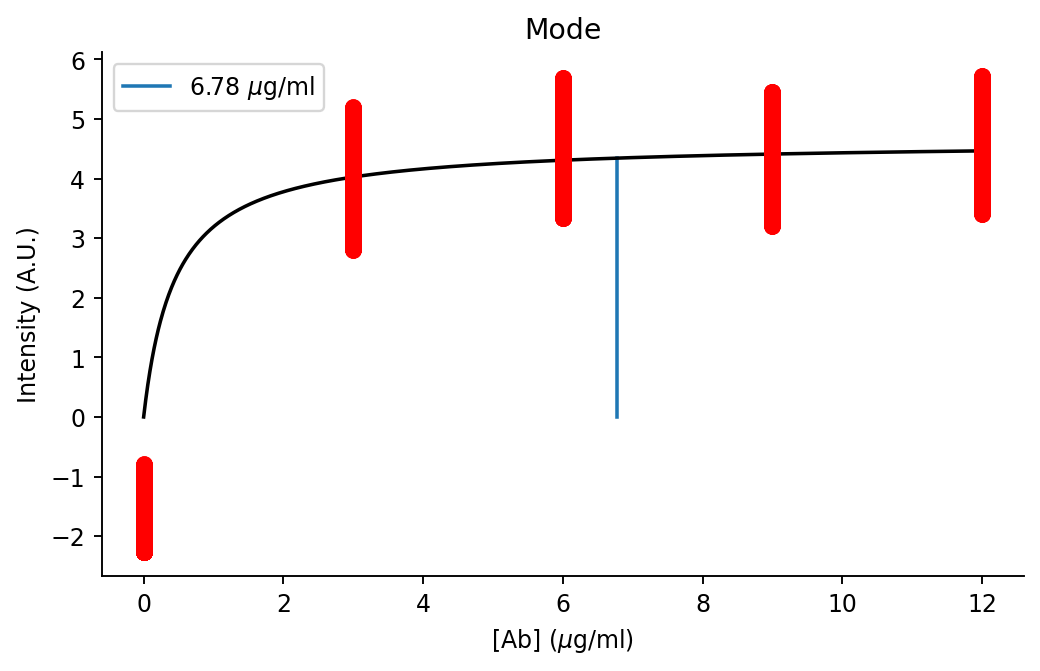

In [125]:
# Curve Fitting
def objective(x, m, h):
    return m * (x / (h + x))

xx = np.concatenate([np.array(list(itertools.repeat(CnsOrd2[i], len(CnsAllTb[CnsOrd2[i]])))) for i in range(len(CnsOrd2))])
yy = np.log(np.concatenate([CnsAllTb[CnsOrd2[i]] for i in range(len(CnsOrd2))]))

popt, ppy = sp.optimize.curve_fit(objective, xx, yy, p0=(np.max(yy), 10))

m,h = popt



#############################################################
# Plot of data and fit



fig, ax = plt.subplots(figsize=(7, 4), dpi=170)

for i in range(15):
    try:
        x_line = np.arange(min(xx), max(xx)*(i+1), 0.01)
        y_line = objective(x_line, m,h)
        # Satturation point
        indsp = np.where(np.diff(y_line) <= 0.0004)[0][0] ######################## SMALLER THAN IN THE MEAN
        ax.plot([x_line[indsp], x_line[indsp]], [0, y_line[indsp]], label = str(x_line[indsp])+" $\mu$g/ml")

        ax.plot(x_line, y_line, color = "Black")
        print(i+1)
        break
    except:
        pass

ax.scatter(xx, yy, color = "Red", zorder=10)


ax.set_ylabel('Intensity (A.U.)')
ax.set_xlabel(r"[Ab] ($\mu$g/ml)")
ax.spines[['right', 'top']].set_visible(False)
ax.legend()
ax.set_title("Mode")
# ax.set_yscale('log')
# ax.set_ylim(0,2)
plt.show()

### Kernel Density Estimate

C:\Users\dgomez\AppData\Local\Temp\ipykernel_101344\570307825.py:11: RuntimeWarning: invalid value encountered in divide
  ax.plot(xx, yy / np.max(yy), linewidth=2, label = str(CnsOrd2[i]))
C:\Users\dgomez\AppData\Local\Temp\ipykernel_101344\570307825.py:14: RuntimeWarning: invalid value encountered in divide
  plt.fill_between(x=xx, y1=yy/ np.max(yy), alpha=0.3)


ModeResult(mode=-1.946073064654934, count=470)
ModeResult(mode=3.846367559908212, count=416)
ModeResult(mode=4.2151409537080395, count=431)
ModeResult(mode=4.197152007669024, count=481)
ModeResult(mode=4.197152007669024, count=428)


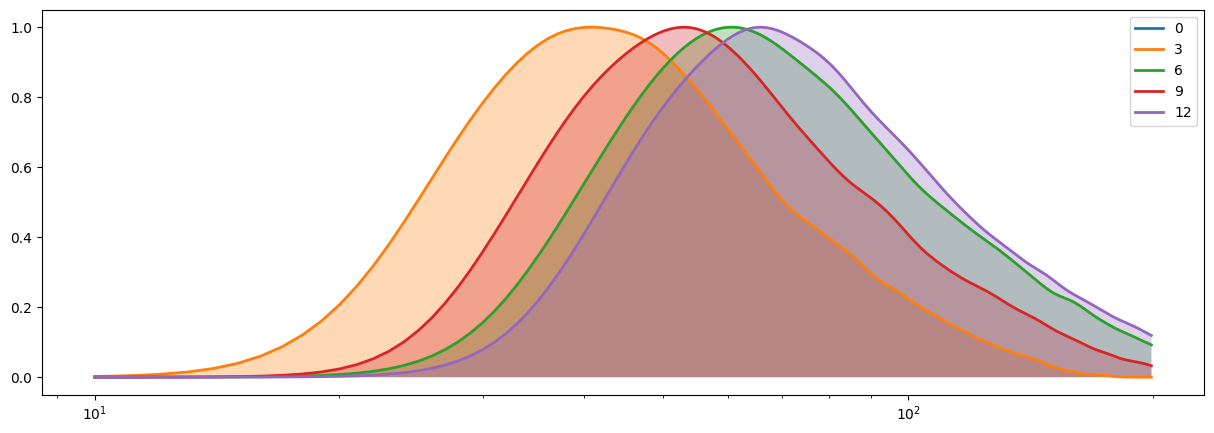

In [126]:
fig, ax = plt.subplots(figsize=(15,5))

mds = []
mnn = []

for i in range(len(CnsOrd2)):
    kde1 = sp.stats.gaussian_kde(CnsAllTb[CnsOrd2[i]])
    xx = np.arange(10, 200, 1)
    yy = kde1(xx)

    ax.plot(xx, yy / np.max(yy), linewidth=2, label = str(CnsOrd2[i]))
    ax.legend()
    ax.set_xscale('log')
    plt.fill_between(x=xx, y1=yy/ np.max(yy), alpha=0.3)
    
    mds.append(sp.stats.mode(np.log(CnsAllTb[CnsOrd2[i]]))[0])
    mnn.append(np.mean(np.log(CnsAllTb[CnsOrd2[i]])))
    
    print(sp.stats.mode(np.log(CnsAllTb[CnsOrd2[i]])))

plt.show()

1


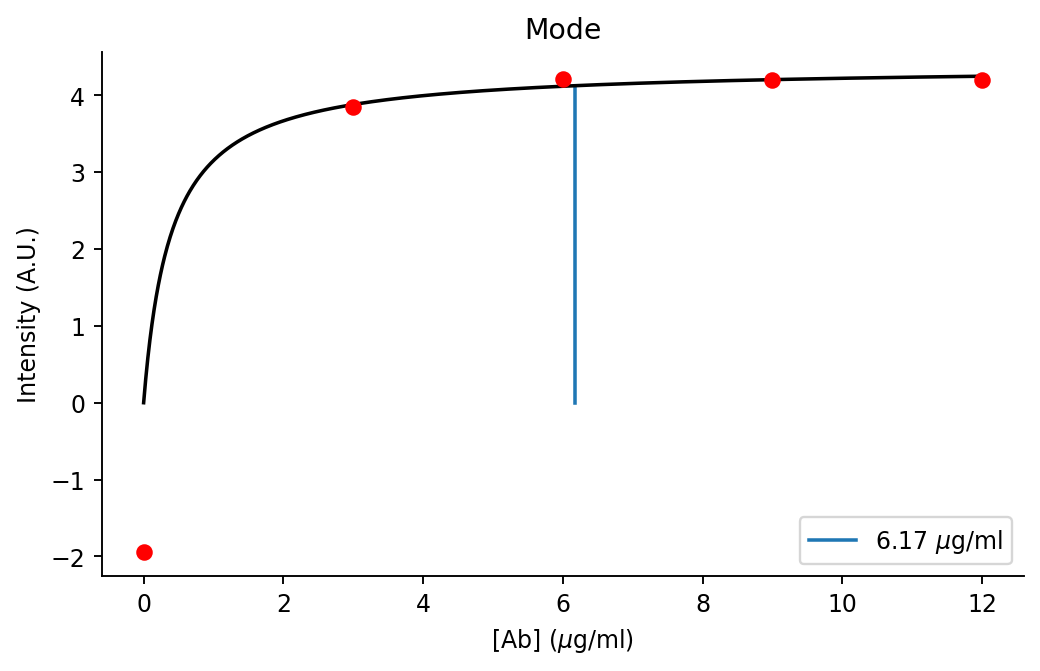

In [127]:
# Curve Fitting
def objective(x, m, h):
    return m * (x / (h + x))


x = CnsOrd2
y = mds


popt, ppy = sp.optimize.curve_fit(objective, x, y, p0=(np.max(y), 10))

m,h = popt



#############################################################
# Plot of data and fit



fig, ax = plt.subplots(figsize=(7, 4), dpi=170)

for i in range(10):
    try:
        x_line = np.arange(min(x), max(x)*(i+1), 0.01)
        y_line = objective(x_line, m,h)
        # Satturation point
        indsp = np.where(np.diff(y_line) <= 0.0004)[0][0] ######################## SMALLER THAN IN THE MEAN
        ax.plot([x_line[indsp], x_line[indsp]], [0, y_line[indsp]], label = str(x_line[indsp])+" $\mu$g/ml")

        ax.plot(x_line, y_line, color = "Black")
        print(i+1)
        break
    except:
        pass

ax.scatter(x, y, color = "Red", zorder=10)


ax.set_ylabel('Intensity (A.U.)')
ax.set_xlabel(r"[Ab] ($\mu$g/ml)")
ax.spines[['right', 'top']].set_visible(False)
ax.legend()
ax.set_title("Mode")
# ax.set_ylim(0,2)
plt.show()

1


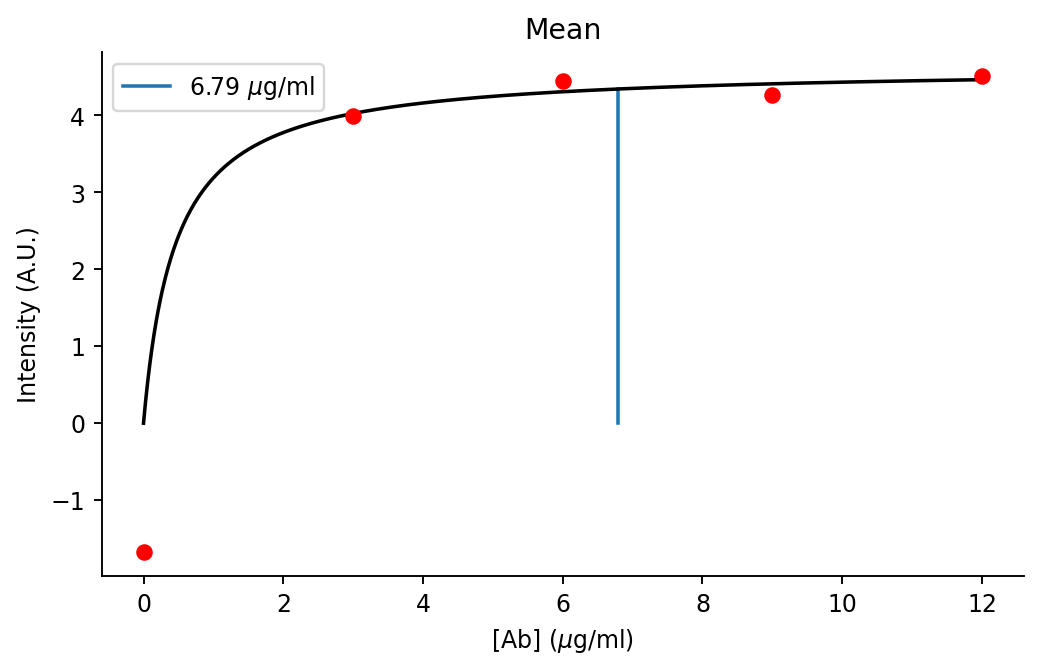

In [131]:
# Curve Fitting
def objective(x, m, h):
    return m * (x / (h + x))


x = CnsOrd2
y = mnn


popt, ppy = sp.optimize.curve_fit(objective, x, y, p0=(np.max(y), 10))

m,h = popt



#############################################################
# Plot of data and fit



fig, ax = plt.subplots(figsize=(7, 4), dpi=170)

for i in range(10):
    try:
        x_line = np.arange(min(x), max(x)*(i+1), 0.01)
        y_line = objective(x_line, m,h)
        # Satturation point
        indsp = np.where(np.diff(y_line) <= 0.0004)[0][0] ######################## SMALLER THAN IN THE MEAN
        ax.plot([x_line[indsp], x_line[indsp]], [0, y_line[indsp]], label = str(x_line[indsp])+" $\mu$g/ml")

        ax.plot(x_line, y_line, color = "Black")
        print(i+1)
        break
    except:
        pass

ax.scatter(x, y, color = "Red", zorder=10)


ax.set_ylabel('Intensity (A.U.)')
ax.set_xlabel(r"[Ab] ($\mu$g/ml)")
ax.spines[['right', 'top']].set_visible(False)
ax.legend()
ax.set_title("Mean")
# ax.set_ylim(0,2)
plt.show()

To be on the safe side, we will choose 9 ug/ml as the working concentration